In [94]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [95]:
countries = ['China', 'Korea', 'Japan', 'USA', 'Germany']
industries = ['steel', 'semi', 'car']

tau_factual = {
    'China': {
        'Korea': {'steel': 1, 'semi': 1, 'car': 1.059},
        'Japan': {'steel': 1, 'semi': 1, 'car': 1},
        'USA': {'steel': 1, 'semi': 1.25, 'car': 1.2275},
        'Germany': {'steel': 1.359, 'semi': 1, 'car': 1.03}
    },
    'Korea':{
        'China': {'steel': 1.005, 'semi': 1.01, 'car': 1.04},
        'Japan': {'steel': 1, 'semi': 1, 'car': 1},
        'USA': {'steel': 1, 'semi': 1, 'car': 1},
        'Germany': {'steel': 1, 'semi': 1, 'car': 1}
    },
    'Japan': {
        'China': {'steel': 1.044, 'semi': 1, 'car': 1.077},
        'Korea': {'steel': 1, 'semi': 1, 'car': 1.065},
        'USA': {'steel': 1, 'semi': 1, 'car': 1.0212},
        'Germany': {'steel': 1, 'semi': 1, 'car': 1}
    },
    'USA': {
        'China': {'steel': 1.05, 'semi': 1, 'car': 1.085},
        'Korea': {'steel': 1, 'semi': 1, 'car': 1},
        'Japan': {'steel': 1, 'semi': 1, 'car': 1},
        'Germany': {'steel': 1, 'semi': 1, 'car': 1.03}
    },
    'Germany': {
        'China': {'steel': 1.05, 'semi': 1, 'car': 1.085},
        'Korea': {'steel': 1, 'semi': 1, 'car': 1},
        'Japan': {'steel': 1, 'semi': 1, 'car': 1},
        'USA': {'steel': 1, 'semi': 1, 'car': 1.0212}
    }

}

factual_tariffs = {country: pd.DataFrame(data) for country, data in tau_factual.items()}

factual_tariffs

{'China':        Korea  Japan     USA  Germany
 steel  1.000      1  1.0000    1.359
 semi   1.000      1  1.2500    1.000
 car    1.059      1  1.2275    1.030,
 'Korea':        China  Japan  USA  Germany
 steel  1.005      1    1        1
 semi   1.010      1    1        1
 car    1.040      1    1        1,
 'Japan':        China  Korea     USA  Germany
 steel  1.044  1.000  1.0000        1
 semi   1.000  1.000  1.0000        1
 car    1.077  1.065  1.0212        1,
 'USA':        China  Korea  Japan  Germany
 steel  1.050      1      1     1.00
 semi   1.000      1      1     1.00
 car    1.085      1      1     1.03,
 'Germany':        China  Korea  Japan     USA
 steel  1.050      1      1  1.0000
 semi   1.000      1      1  1.0000
 car    1.085      1      1  1.0212}

In [96]:
#데이터 불러오기
directory = '/Users/minjiku/Desktop/2024GE학술제'

optimal_tariffs = {}
for country in ['China', 'Korea', 'Japan', 'USA', 'Germany']:
    file_path = os.path.join(directory, f'{country}_optimal_tariffs.csv')
    df = pd.read_csv(file_path, index_col=0)
    optimal_tariffs[country] = df

optimal_tariffs

{'China':           Korea     Japan       USA   Germany
 steel  1.089951  1.378702  1.361284  1.395720
 semi   1.266773  1.199345  1.415658  1.096265
 car    1.472587  1.435724  1.337378  1.469292,
 'Korea':           China     Japan       USA   Germany
 steel  1.368495  1.248160  1.025783  1.463426
 semi   1.037174  1.319703  1.143693  1.351737
 car    1.366468  1.387878  1.252690  1.345724,
 'Japan':           China     Korea       USA   Germany
 steel  1.006695  1.335971  1.257456  1.131950
 semi   1.162345  1.073504  1.015447  1.368247
 car    1.476532  1.264587  1.399033  1.125063,
 'USA':           China     Korea     Japan   Germany
 steel  1.286350  1.040434  1.345204  1.438985
 semi   1.468061  1.225486  1.414204  1.273980
 car    1.445474  1.360315  1.191526  1.016455,
 'Germany':           China     Korea     Japan       USA
 steel  1.155069  1.229632  1.144803  1.125782
 semi   1.199783  1.395275  1.198341  1.378916
 car    1.404471  1.372016  1.066215  1.422535}

시각화

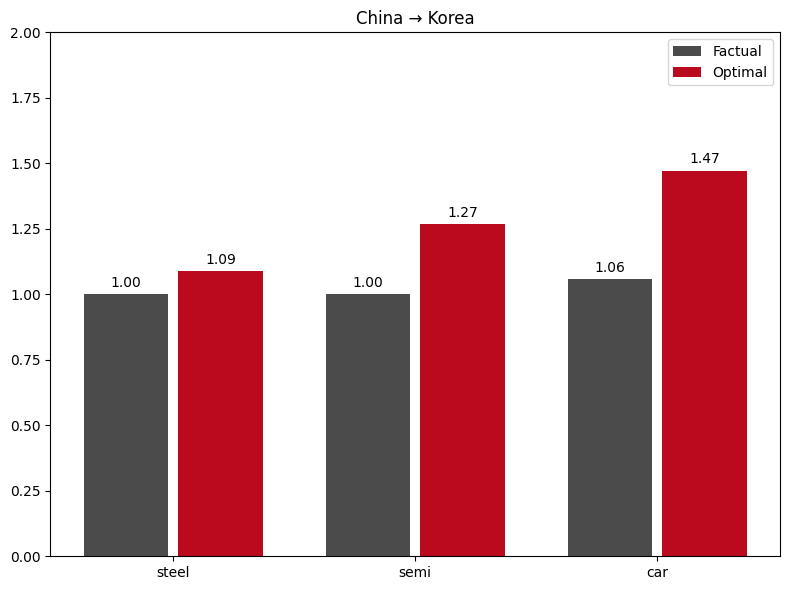

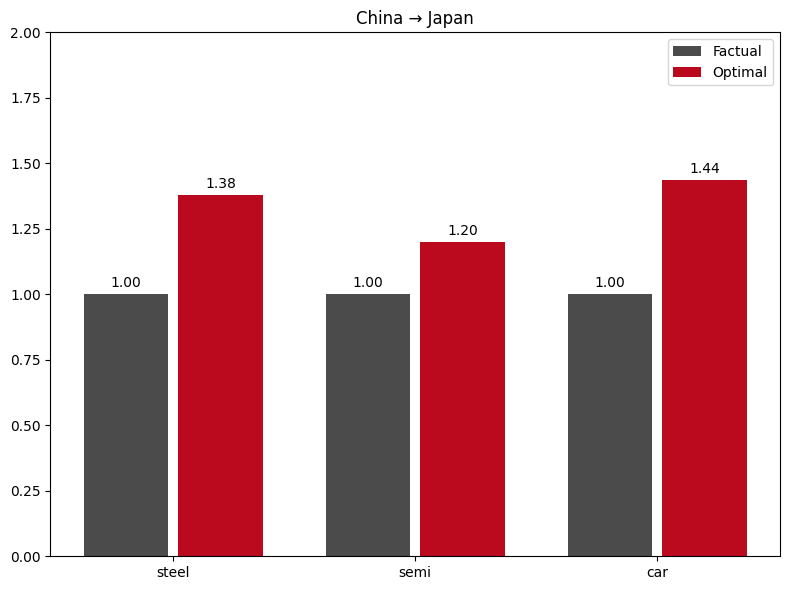

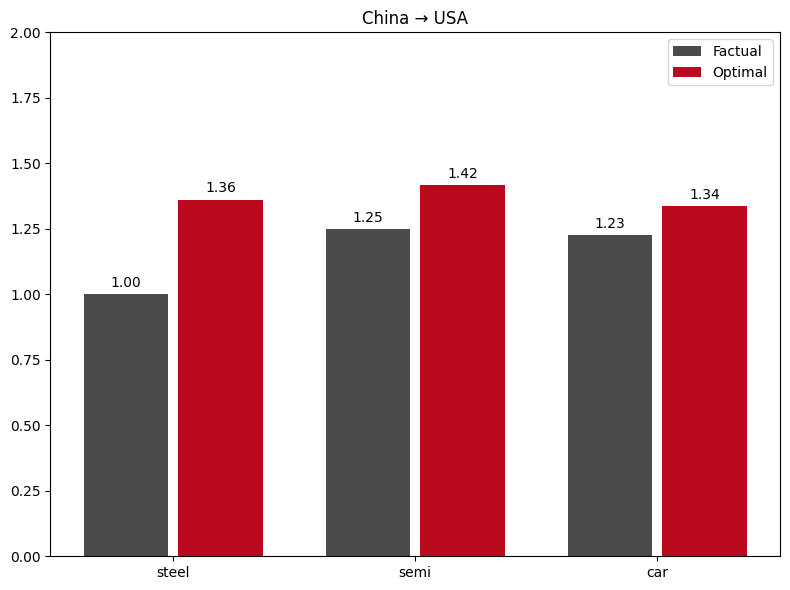

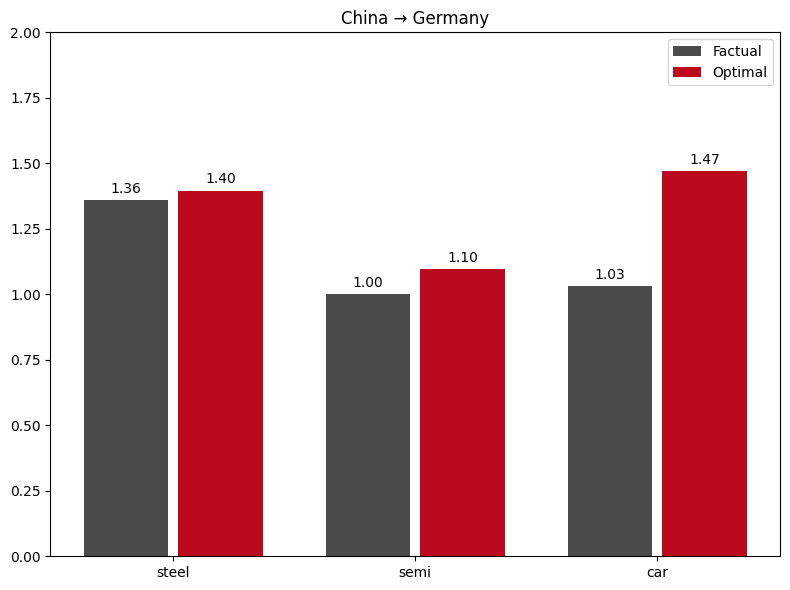

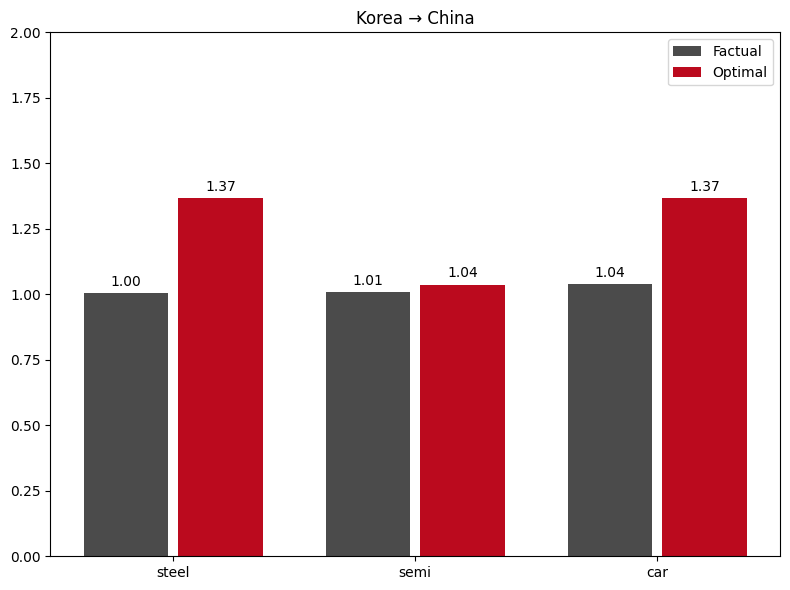

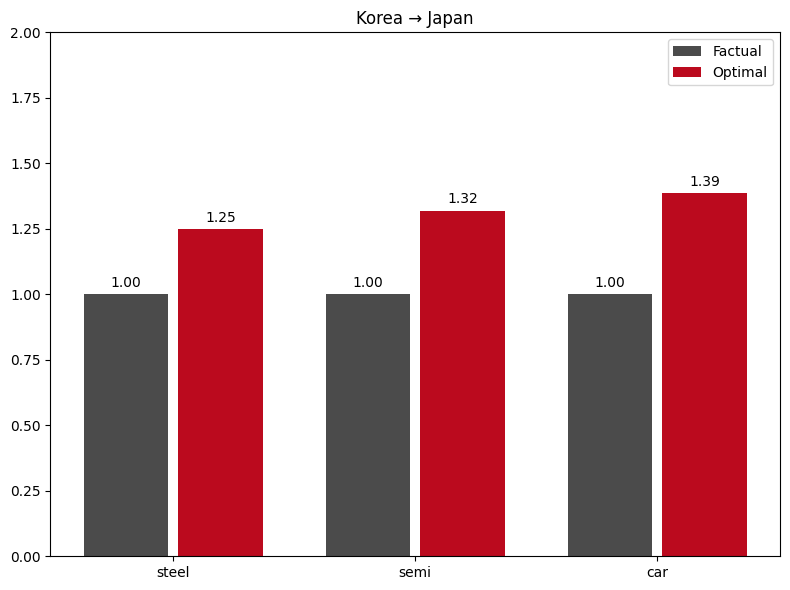

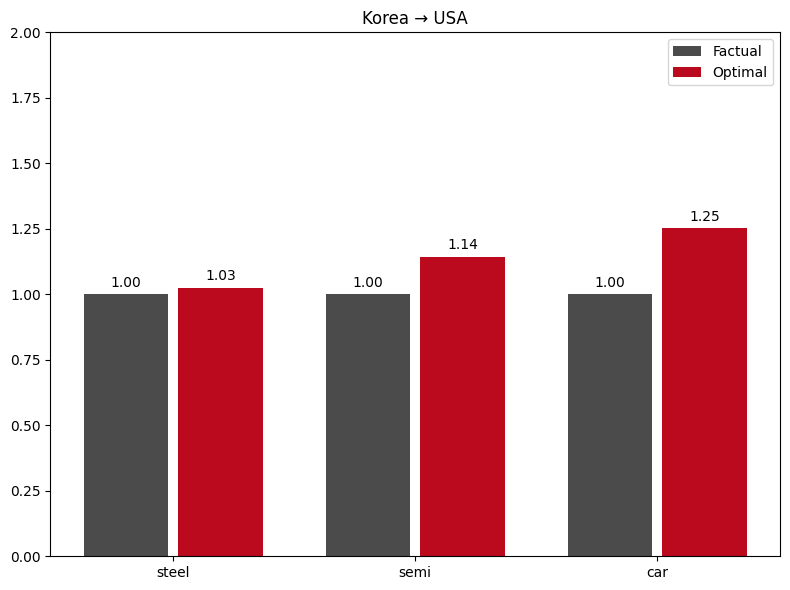

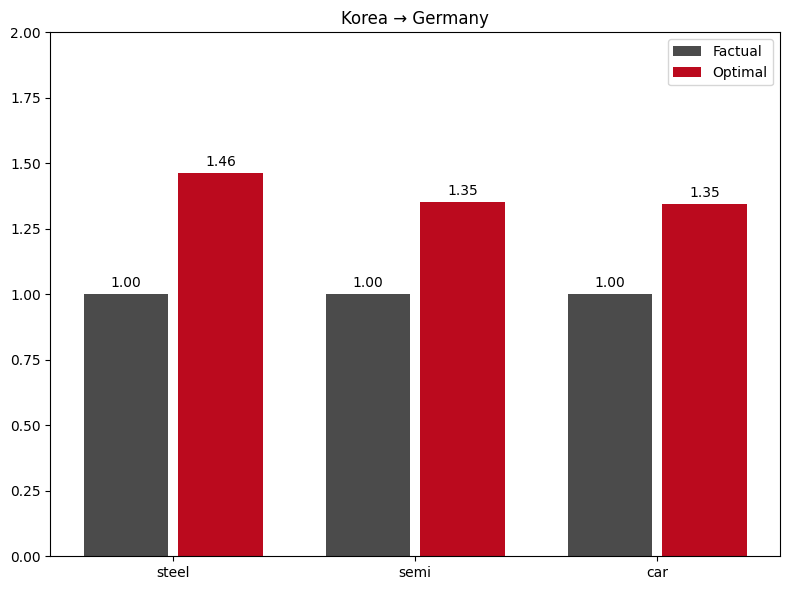

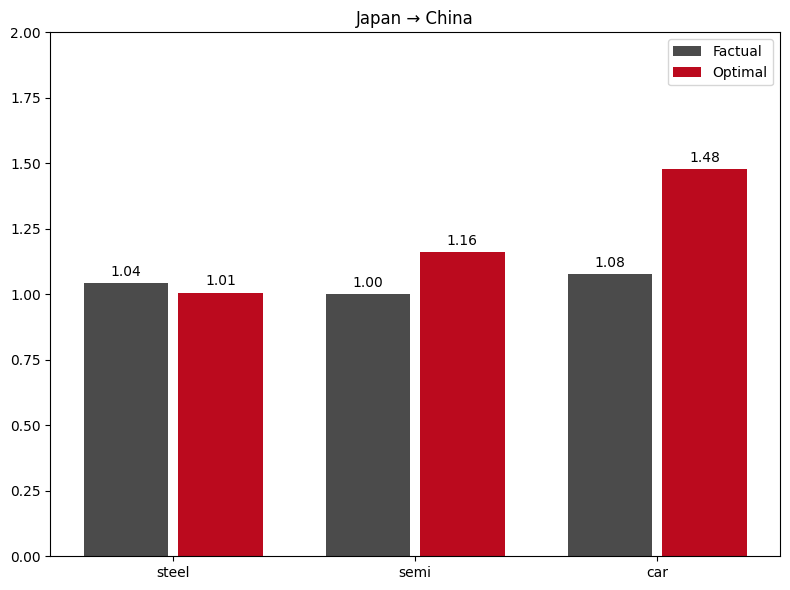

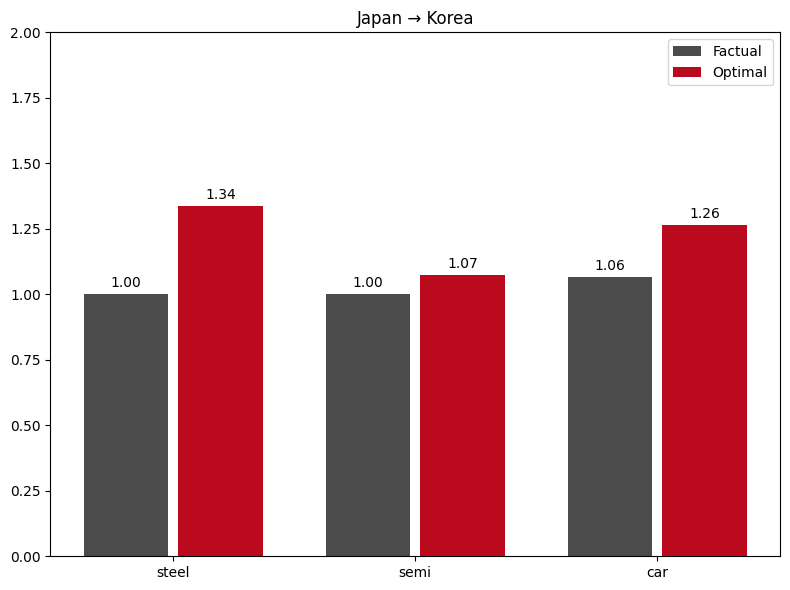

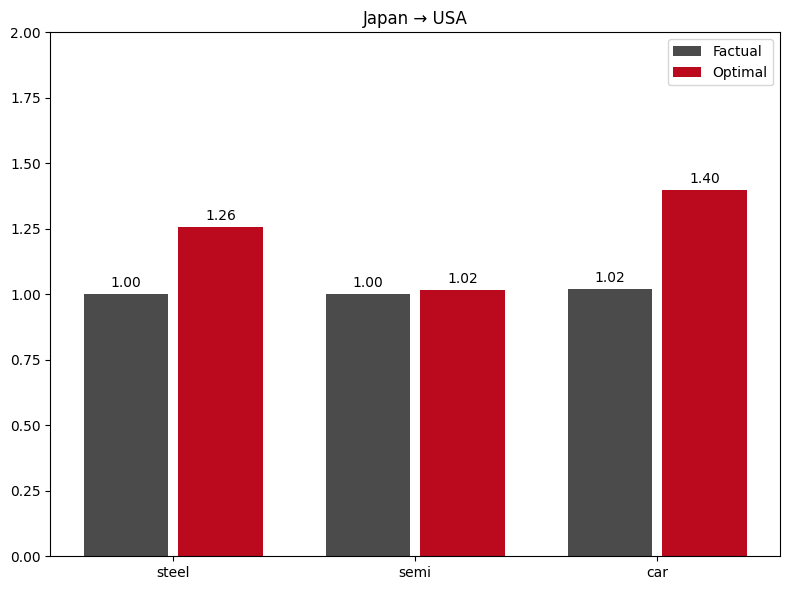

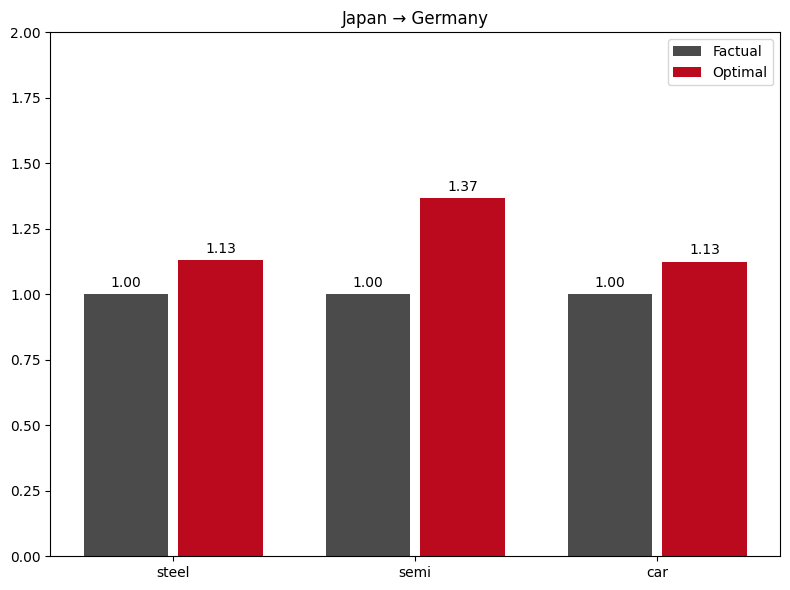

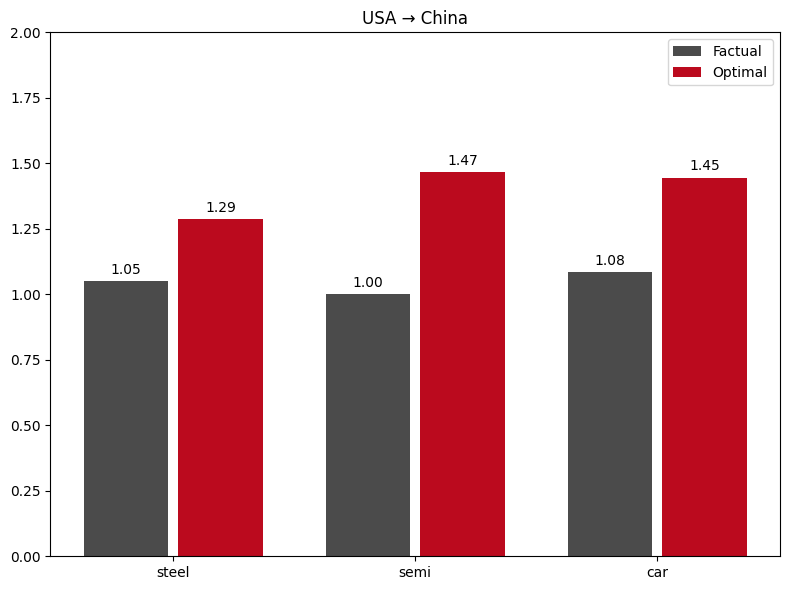

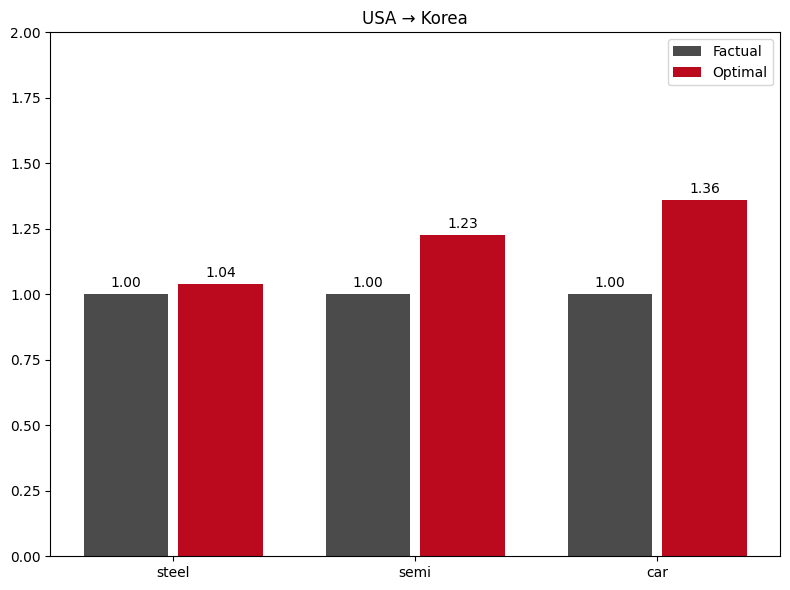

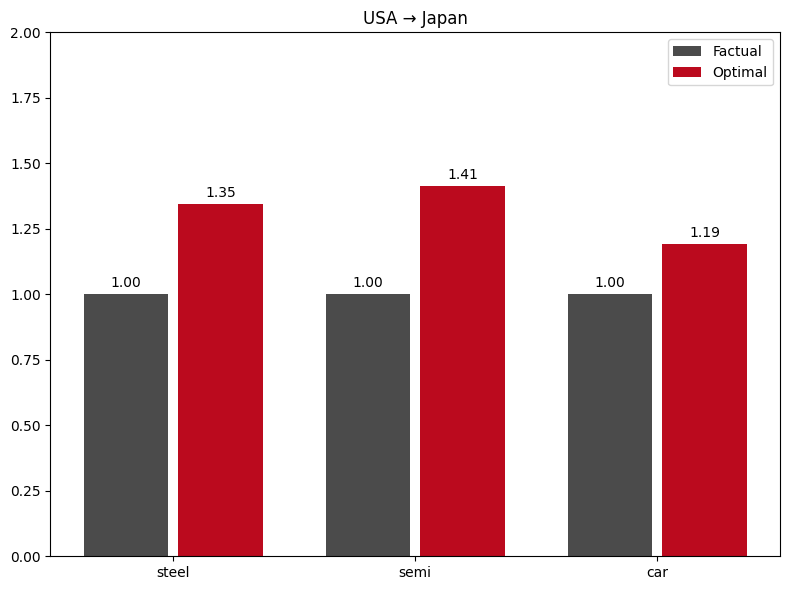

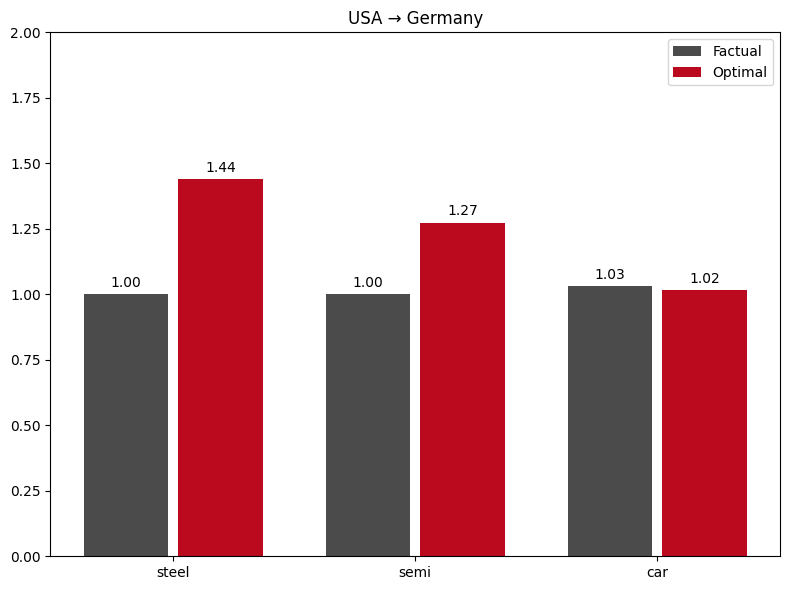

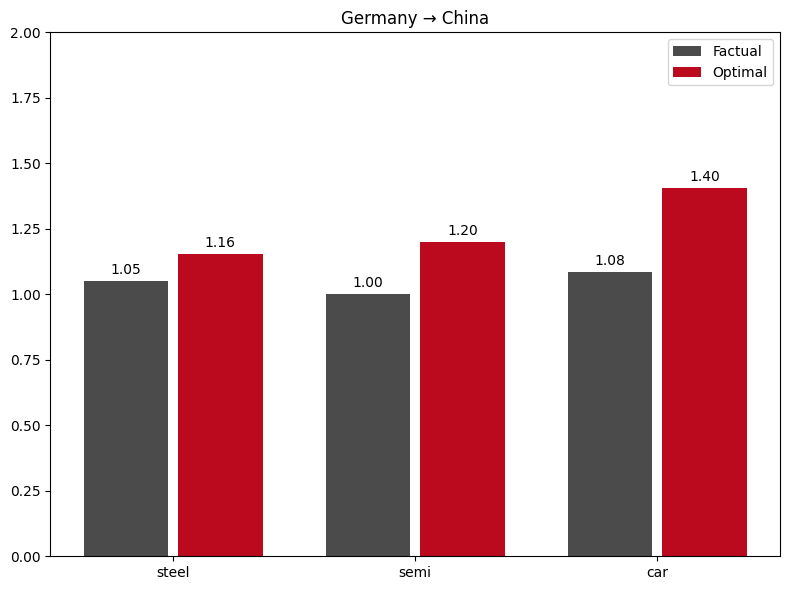

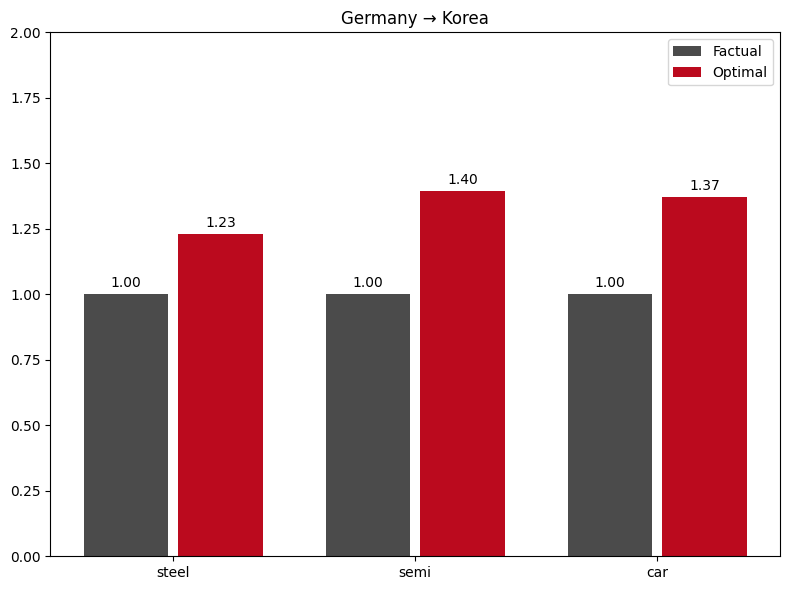

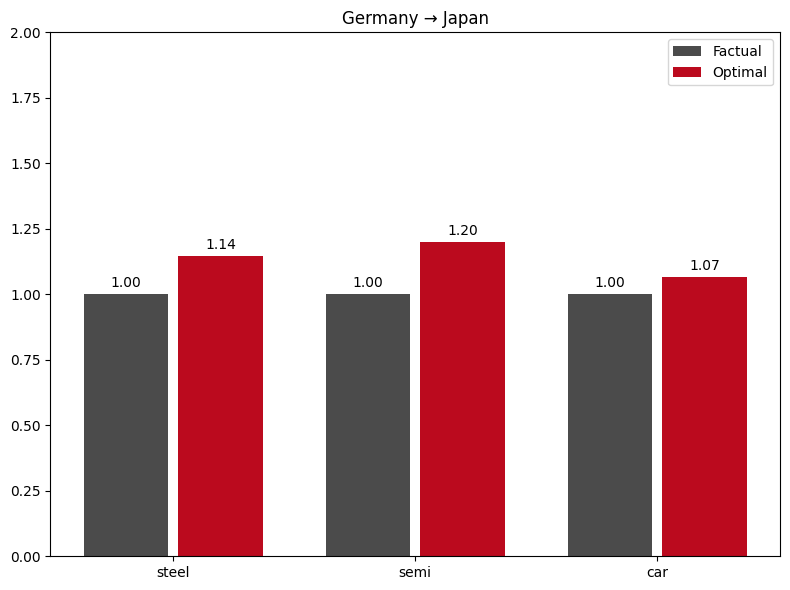

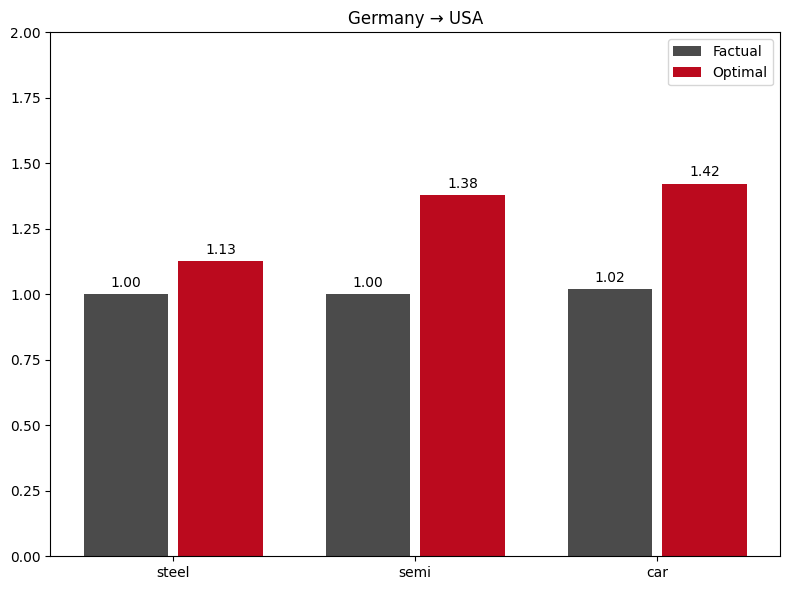

In [97]:
# Adjusting the plotting code to generate 12 separate graphs
for i, exporter in enumerate(countries):
    for j, importer in enumerate(countries):
        if exporter != importer:
            fig, ax = plt.subplots(figsize=(8, 6))
            ind = np.arange(len(industries))
            width = 0.35

            factual_values = factual_tariffs[exporter].loc[:, importer]
            optimal_values = optimal_tariffs[exporter].loc[:, importer]

            # factual 값을 막대로 표시
            rects1 = ax.bar(ind - width/2 - 0.02, factual_values, width, label='Factual', color = '#4B4B4B')
            # optimal 값을 막대로 표시
            rects2 = ax.bar(ind + width/2 + 0.02, optimal_values, width, label='Optimal', color='#bb0a1e')
        
            ax.bar_label(rects1, padding=3, fmt='%.2f')
            ax.bar_label(rects2, padding=3, fmt='%.2f')
            ax.set_ylim([0,2.0])

            ax.set_ylim(0, 2)
            ax.set_title(f'{exporter} → {importer}')
            ax.set_xticks(ind)
            ax.set_xticklabels(industries)
            ax.legend()

            plt.tight_layout()
            plt.show()
